# 데이터 읽어와서 확인

In [1]:
import glob
PATH = "C:\\Users\\user\\데이터 분석을 위한 전처리와 시각화\\9장\\"
file_list = glob.glob(f'{PATH}'+'/*.xlsx')
file_list

['C:\\Users\\user\\데이터 분석을 위한 전처리와 시각화\\9장\\대한민국행복지도_건강.xlsx',
 'C:\\Users\\user\\데이터 분석을 위한 전처리와 시각화\\9장\\대한민국행복지도_경제.xlsx',
 'C:\\Users\\user\\데이터 분석을 위한 전처리와 시각화\\9장\\대한민국행복지도_관계및사회참여.xlsx',
 'C:\\Users\\user\\데이터 분석을 위한 전처리와 시각화\\9장\\대한민국행복지도_교육.xlsx',
 'C:\\Users\\user\\데이터 분석을 위한 전처리와 시각화\\9장\\대한민국행복지도_삶의만족도.xlsx',
 'C:\\Users\\user\\데이터 분석을 위한 전처리와 시각화\\9장\\대한민국행복지도_안전.xlsx',
 'C:\\Users\\user\\데이터 분석을 위한 전처리와 시각화\\9장\\대한민국행복지도_여가.xlsx',
 'C:\\Users\\user\\데이터 분석을 위한 전처리와 시각화\\9장\\대한민국행복지도_환경.xlsx']

In [2]:
from pandas import *

# 파일명과 변수명 매핑
variable_names = {
    '대한민국행복지도_건강.xlsx': 'happy_health',
    '대한민국행복지도_경제.xlsx': 'happy_econo',
    '대한민국행복지도_관계및사회참여.xlsx': 'happy_relation',
    '대한민국행복지도_교육.xlsx': 'happy_edu',
    '대한민국행복지도_삶의만족도.xlsx': 'happy_life',
    '대한민국행복지도_안전.xlsx': 'happy_safe',
    '대한민국행복지도_여가.xlsx': 'happy_leisure',
    '대한민국행복지도_환경.xlsx': 'happy_environ'
}

# 파일 읽기 및 변수 할당
for file_path in file_list:
    file_name = file_path.split('\\')[-1]         # 파일 이름만 선택
    if file_name in variable_names:              # 딕셔너리에 파일이름 존재하는지 확인
        data = read_excel(file_path)             # 존재하면 data에 저장
        globals()[variable_names[file_name]] = data  # 변수 할당
        print(variable_names[file_name])        # 할당된 변수이름 출력
        print(data.head())
        print()

happy_health
   No     시도   구군      평균  주관적 건강수준 인지율  인구 십만명당 정신건강증진기관 수  \
0   1  서울특별시  종로구  0.9220        0.8424              0.6914   
1   2  서울특별시   중구  0.6742        0.5772              0.4106   
2   3  서울특별시  용산구  0.5898        0.9819              0.3353   
3   4  서울특별시  성동구  0.4794        0.5465              0.3321   
4   5  서울특별시  광진구  0.6373        0.8534              0.7393   

   인구 천명당 의료기관 종사 의사수  건강생활실천율  인구 천명당 의료기관병상수  
0              1.0000   0.9697          0.7616  
1              0.9995   0.9669          0.4043  
2              0.6046   0.9844          0.1433  
3              0.5783   0.9776          0.2111  
4              0.6352   0.8022          0.1936  

happy_econo
   No     시도   구군      평균  1인당 지역내총생산(GRDP)  인구 천명당 사업체수  인구 천명당 종사자수  \
0   1  서울특별시  종로구  1.0000            1.0000       1.0000       1.0000   
1   2  서울특별시   중구  0.9806            1.0000       1.0000       1.0000   
2   3  서울특별시  용산구  0.6915            0.6334       0.5493       0.7282   
3   4  서울

# 데이터병합

In [3]:
city = list(happy_life['시도'].unique())
happy_merge=DataFrame({'시도':city})
happy_merge

,시도
0,서울특별시
1,부산광역시
2,대구광역시
3,인천광역시
4,광주광역시
5,대전광역시
6,울산광역시
7,세종특별자치시
8,경기도
9,강원도


In [4]:
#삶의 만족도
life = happy_life['삶의 만족도'].groupby(by=happy_life['시도']).mean()
happy_merge = merge(happy_merge, life, on='시도')
happy_merge.head()

,시도,삶의 만족도
0,서울특별시,0.490972
1,부산광역시,0.362081
2,대구광역시,0.363988
3,인천광역시,0.411480
4,광주광역시,0.484480


In [5]:
# 나머지 7개
# 데이터 프레임과 관련 컬럼명, 그리고 최종 병합할 이름을 리스트로 준비
data_info = [
    [happy_health, '평균', '건강'],
    [happy_safe, '평균', '안전'],
    [happy_environ, '평균', '환경'],
    [happy_econo, '평균', '경제'],
    [happy_edu, '평균', '교육'],
    [happy_relation, '평균', '관계 및 사회참여'],
    [happy_leisure, '평균', '여가']
]

# 이미 병합된 'happy_merge'에 추가 병합을 수행
for data, column, new_column_name in data_info:
    # DataFrame에서 '시도'를 기준으로 그룹화하고 평균을 계산
    group_mean = data[column].groupby(data['시도']).mean().rename(new_column_name).reset_index()
    
    # 병합할 때 중복 열이 생성되지 않도록 suffixes 파라미터를 ('', '_drop')로 설정
    happy_merge = merge(happy_merge, group_mean, on='시도', suffixes=('', '_drop'))
    
    # 불필요한 중복 열 삭제
    happy_merge = happy_merge.loc[:, ~happy_merge.columns.str.endswith('_drop')]

# 최종 병합된 데이터 확인
happy_merge

,시도,삶의 만족도,건강,안전,환경,경제,교육,관계 및 사회참여,여가
0,서울특별시,0.490972,0.569532,0.552256,0.470712,0.532820,0.399412,0.390656,0.286732
1,부산광역시,0.362081,0.511906,0.404875,0.448719,0.438038,0.504594,0.294719,0.153587
2,대구광역시,0.363988,0.482325,0.358429,0.552500,0.393975,0.585838,0.407486,0.234925
3,인천광역시,0.411480,0.339620,0.421020,0.515020,0.410820,0.502920,0.504920,0.244590
4,광주광역시,0.484480,0.632300,0.266440,0.607480,0.387380,0.689680,0.637800,0.454980
5,대전광역시,0.407580,0.663580,0.206780,0.582380,0.416260,0.840780,0.510820,0.347960
6,울산광역시,0.471980,0.420040,0.477060,0.393440,0.642580,0.763240,0.676440,0.418420
7,세종특별자치시,0.907700,0.232000,0.157800,0.652400,0.511900,0.587000,0.673700,0.447800
8,경기도,0.426023,0.353952,0.325255,0.557977,0.468926,0.668619,0.601532,0.377561
9,강원도,0.619506,0.329506,0.548000,0.639839,0.386861,0.488533,0.563122,0.632750


# 데이터 검산

In [6]:
checkname_list = [[happy_health, '건강'],
                 [happy_safe, '안전'],
                 [happy_environ, '환경'],
                 [happy_econo, '경제'],
                 [happy_edu, '교육'],
                 [happy_relation, '관계 및 사회참여'],
                 [happy_leisure, '여가']]


for df, name in checkname_list:
    print(f'원본 {name}=', df['평균'].mean())
    print(f'{name}=', happy_merge[name].mean())    

원본 건강= 0.40443508771929826
건강= 0.4094014744072605
원본 안전= 0.4569065789473684
안전= 0.42088164252386323
원본 환경= 0.5806381578947368
환경= 0.5794064414748389
원본 경제= 0.3894403508771929
경제= 0.4076346792607561
원본 교육= 0.5396557017543859
교육= 0.5786529913992841
원본 관계 및 사회참여= 0.468419298245614
관계 및 사회참여= 0.49763200954204206
원본 여가= 0.4623894736842106
여가= 0.46490970955241717


In [7]:
happy_merge.describe()

,삶의 만족도,건강,안전,환경,경제,교육,관계 및 사회참여,여가
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,0.518189,0.409401,0.420882,0.579406,0.407635,0.578653,0.497632,0.464910
std,0.138257,0.127636,0.123557,0.097299,0.111265,0.125408,0.114394,0.176206
min,0.362081,0.232000,0.157800,0.393440,0.196543,0.399412,0.294719,0.153587
25%,0.411480,0.329506,0.358429,0.515020,0.386861,0.488533,0.402183,0.347960
50%,0.490972,0.401064,0.446100,0.582380,0.410820,0.587000,0.487464,0.454980
75%,0.553100,0.482325,0.484835,0.652400,0.468926,0.648047,0.601532,0.632750
max,0.907700,0.663580,0.573155,0.735600,0.642580,0.840780,0.676440,0.702891


In [8]:
happy_merge.mean(axis=0)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20204\1329689105.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  happy_merge.mean(axis=0)


삶의 만족도       0.518189
건강           0.409401
안전           0.420882
환경           0.579406
경제           0.407635
교육           0.578653
관계 및 사회참여    0.497632
여가           0.464910
dtype: float64

In [9]:
happy_merge.mean(axis=1)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20204\2790313917.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  happy_merge.mean(axis=1)


0     0.461637
1     0.389815
2     0.422433
3     0.418799
4     0.520068
5     0.497017
6     0.532900
7     0.521288
8     0.472481
9     0.526015
10    0.500400
11    0.508128
12    0.488729
13    0.500111
14    0.436254
15    0.482856
16    0.559075
dtype: float64

In [10]:
happy_merge.set_index('시도').mean(axis=1)

시도
서울특별시      0.461637
부산광역시      0.389815
대구광역시      0.422433
인천광역시      0.418799
광주광역시      0.520068
대전광역시      0.497017
울산광역시      0.532900
세종특별자치시    0.521288
경기도        0.472481
강원도        0.526015
충청북도       0.500400
충청남도       0.508128
전라북도       0.488729
전라남도       0.500111
경상북도       0.436254
경상남도       0.482856
제주특별자치도    0.559075
dtype: float64

In [11]:
happy_merge.corr()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20204\2219990735.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  happy_merge.corr()


,삶의 만족도,건강,안전,환경,경제,교육,관계 및 사회참여,여가
삶의 만족도,1.000000,-0.570466,-0.191709,0.572262,-0.057815,-0.113522,0.519122,0.497880
건강,-0.570466,1.000000,-0.210138,-0.357841,0.071809,0.242186,-0.175048,-0.405151
안전,-0.191709,-0.210138,1.000000,-0.124581,-0.142781,-0.519065,-0.444827,0.382730
환경,0.572262,-0.357841,-0.124581,1.000000,-0.716187,-0.146646,0.169838,0.494416
경제,-0.057815,0.071809,-0.142781,-0.716187,1.000000,0.451395,0.298562,-0.367461
교육,-0.113522,0.242186,-0.519065,-0.146646,0.451395,1.000000,0.462585,-0.070109
관계 및 사회참여,0.519122,-0.175048,-0.444827,0.169838,0.298562,0.462585,1.000000,0.216653
여가,0.497880,-0.405151,0.382730,0.494416,-0.367461,-0.070109,0.216653,1.000000


# 시각화

In [12]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
plt.rc('font', family=font_name)

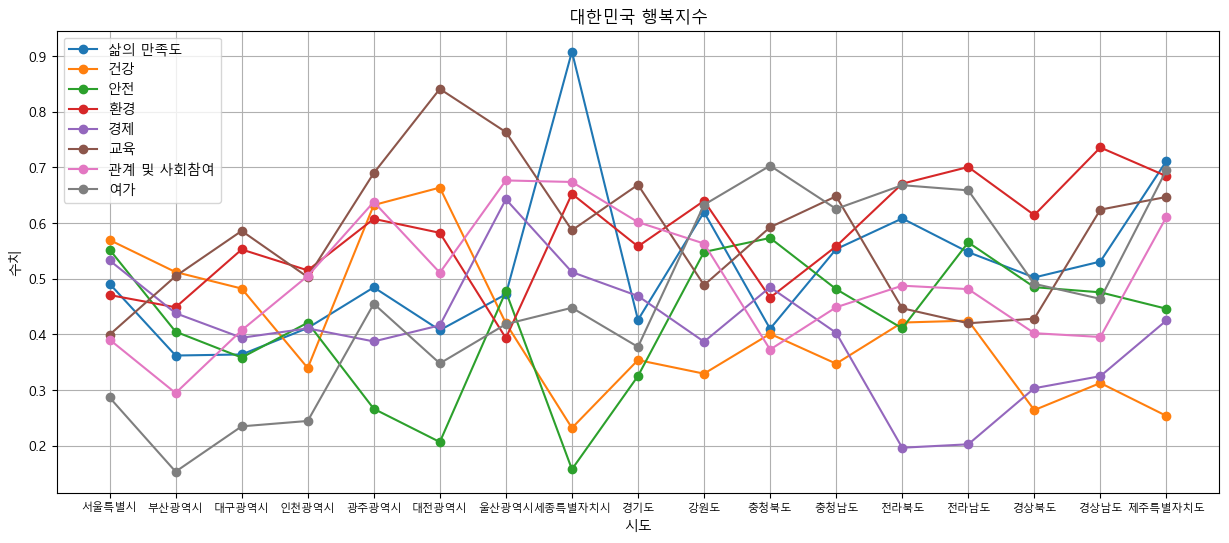

In [13]:
# 선 그래프

plt.figure(figsize=(15,6))
items = list(happy_merge.columns[1:9])
for a in items:
    chartdata = happy_merge[a]
    plt.plot(chartdata, marker='o', label=a)

plt.xlabel('시도')
plt.ylabel('수치')
plt.xticks(range(17), happy_merge['시도'],fontsize=8)
plt.title('대한민국 행복지수')
plt.legend()
plt.grid()
plt.show()

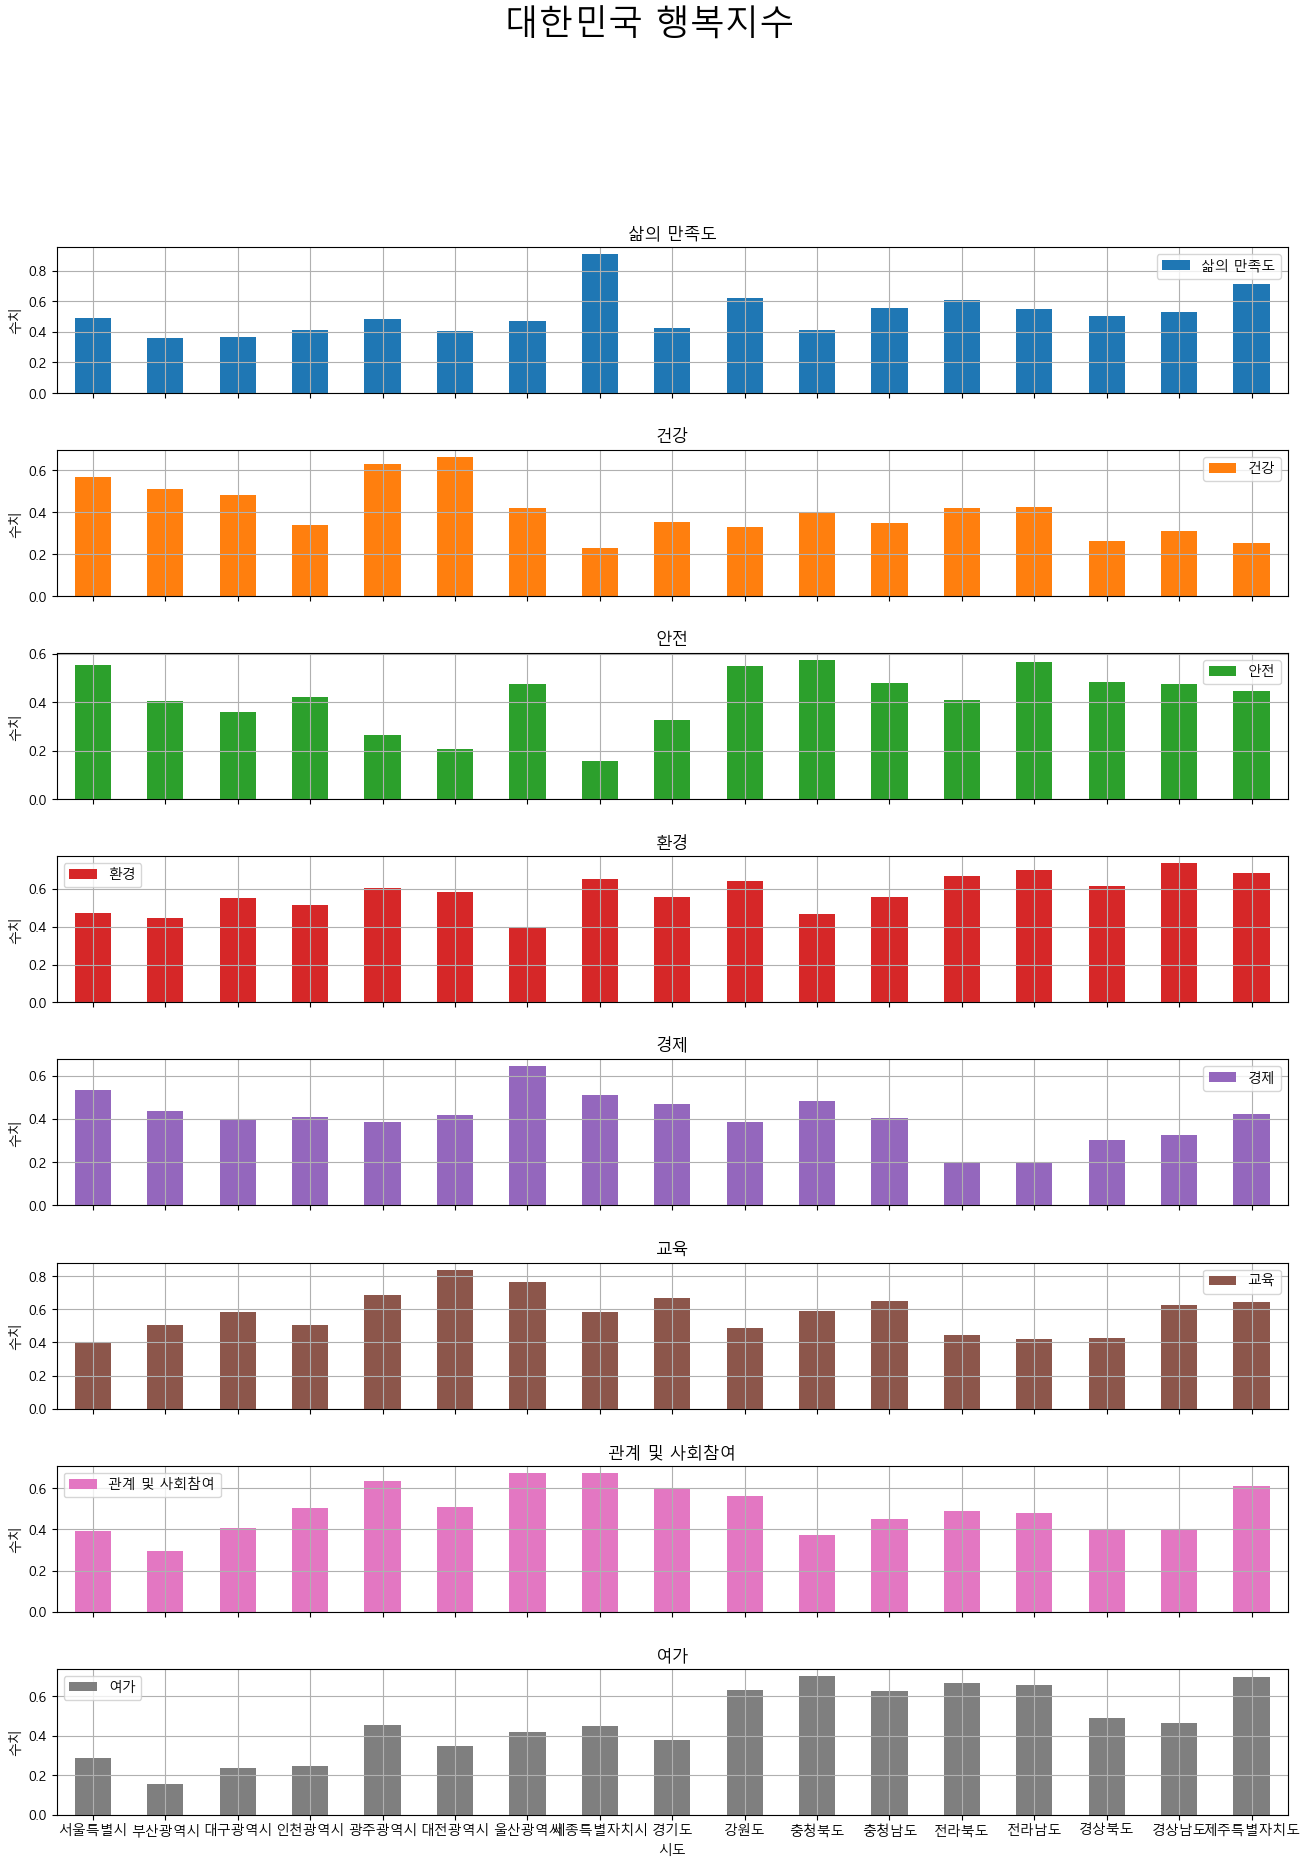

In [14]:
# 막대그래프

from numpy import *

happy_merge.plot(kind='bar', xlabel='시도', ylabel='수치', figsize=(15,20), grid=True, subplots=True)

plt.suptitle('대한민국 행복지수', fontsize=25)
plt.tight_layout(pad = 8, h_pad = 2)
plt.xticks(arange(17), city, rotation=360)
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20204\2153106393.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_mat = happy_merge.corr()


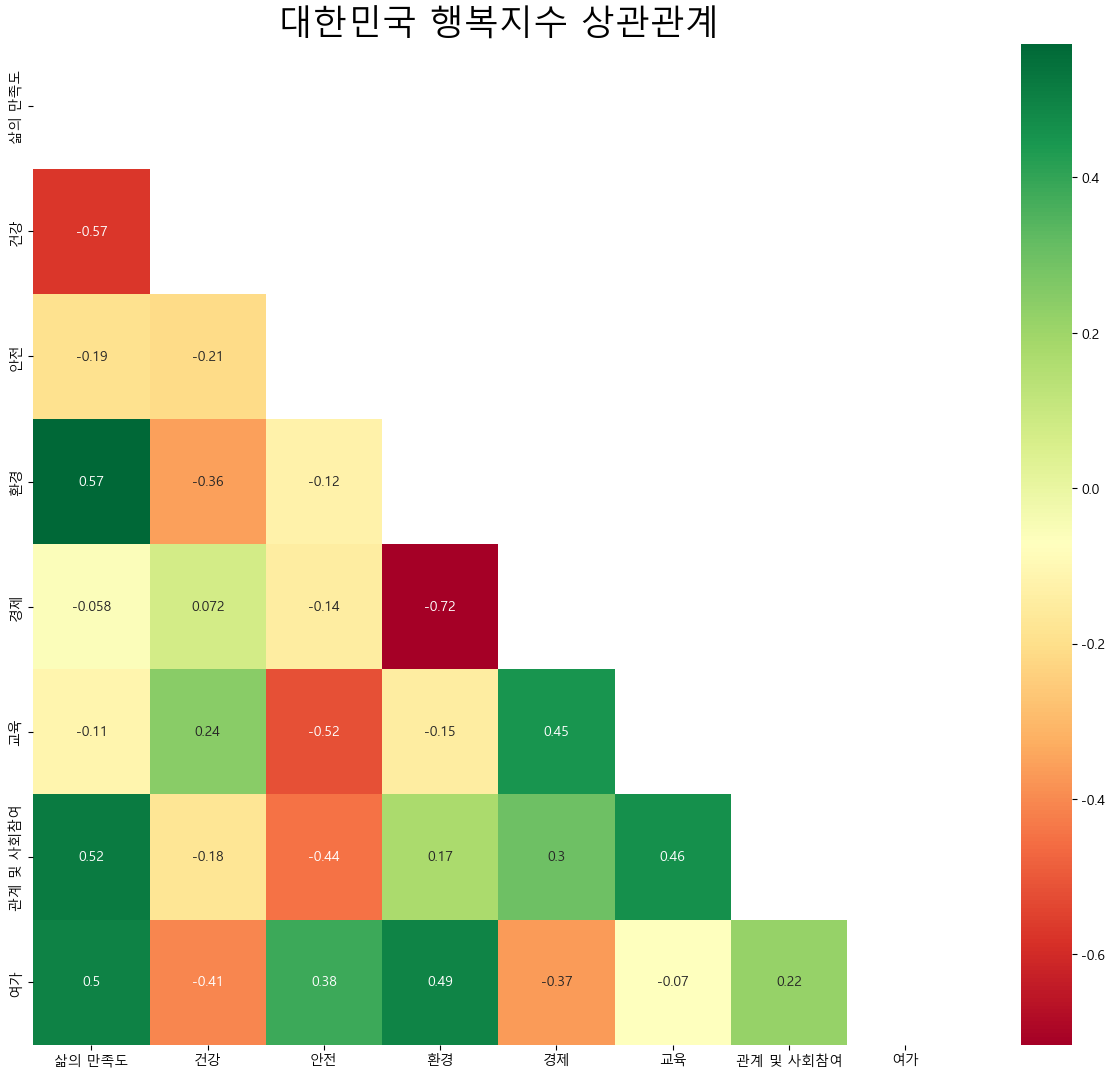

In [15]:
import seaborn as sns

plt.figure(figsize=(15,13))
plt.title('대한민국 행복지수 상관관계', fontsize=25)
plt.rc('axes', unicode_minus=False)

correlation_mat = happy_merge.corr()
upp_mat = triu(correlation_mat)

sns.heatmap(correlation_mat, mask=upp_mat, annot=True, cmap='RdYlGn')
plt.show()